In [57]:
import csv
import matplotlib.pyplot as plt

In [33]:
with open('/Users/StensolaTor/Fundrive/hpm/hpm_201903101138.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    data = []
    datum = []
    for row in readCSV:
        if len(row) > 0:
            if row[0] == '':
                datum.append(''.join(row[1:]))
            else:
                datum = row
            data.append(datum)

In [72]:
myData = {
    'Sniff': [],
    'Position': [],
    'Reward trigger': [],
    'Reward onset': [],
    'Reward offset': [],
    'Licks': [],
}

In [73]:
for datum in data:
    if datum[0] == 'x':
        myData['Sniff'].append(datum[1:])
    elif datum[0] == 'M':
        myData['Position'].append(datum[1:])
    elif datum[0] == 'R':
        myData['Reward trigger'].append(datum[1:])
    elif datum[0] == 'r':
        myData['Reward onset'].append(datum[1:])
    elif datum[0] == 'p':
        myData['Reward offset'].append(datum[1:])
    elif datum[0] == 'l':
        myData['Licks'].append(datum[1:])

In [59]:
time = []
pos = []
for rows in myData['M']:
    pos.append(float(rows[0]))
    time.append(float(rows[1]))

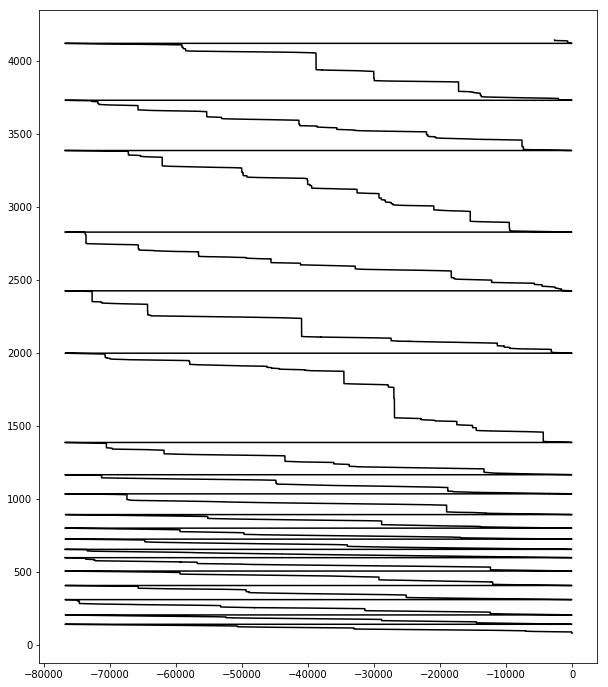

In [68]:
plt.figure(figsize=[10,12])
plt.plot(pos,time,'k')

In [78]:
myData['Reward onset']

[['130838', '141.453'],
 ['130838', '141.453'],
 ['194954', '205.503'],
 ['299849', '310.291'],
 ['396587', '406.932'],
 ['495660', '505.908'],
 ['587333', '597.491'],
 ['644290', '654.390'],
 ['714299', '724.331'],
 ['789667', '799.624'],
 ['882534', '892.399'],
 ['1024697', '1034.422'],
 ['1024697', '1034.422'],
 ['1155739', '1165.333'],
 ['1376789', '1386.164'],
 ['1988556', '1997.329'],
 ['2416000', '2424.353'],
 ['2818356', '2826.313'],
 ['3377532', '3384.939'],
 ['3721673', '3728.744'],
 ['4111775', '4118.463']]

In [133]:
lick_dir = [float(x[1]) for x in myData['Licks'] if x[0] is '1']

In [134]:
lick_dir

[88901.0,
 90342.0,
 91759.0,
 92012.0,
 93704.0,
 105378.0,
 107500.0,
 107735.0,
 107735.0,
 125312.0,
 130889.0,
 132297.0,
 134135.0,
 134188.0,
 134392.0,
 137523.0,
 137951.0,
 138146.0,
 145375.0,
 151119.0,
 151280.0,
 151448.0,
 151777.0,
 152248.0,
 166858.0,
 167003.0,
 170048.0,
 171777.0,
 171985.0,
 186146.0,
 195393.0,
 195400.0,
 195412.0,
 195642.0,
 197970.0,
 201493.0,
 221275.0,
 237303.0,
 243608.0,
 297561.0,
 300062.0,
 300282.0,
 300693.0,
 301948.0,
 303336.0,
 305595.0,
 305767.0,
 309920.0,
 334583.0,
 341240.0,
 341397.0,
 367222.0,
 367389.0,
 391683.0,
 399242.0,
 399244.0,
 399249.0,
 399251.0,
 399387.0,
 399510.0,
 399602.0,
 457527.0,
 459165.0,
 497156.0,
 523243.0,
 587384.0,
 587533.0,
 592951.0,
 593157.0,
 600593.0,
 644341.0,
 644349.0,
 646876.0,
 649544.0,
 650549.0,
 650759.0,
 682506.0,
 687042.0,
 708943.0,
 714474.0,
 714600.0,
 714713.0,
 717121.0,
 734372.0,
 779384.0,
 783557.0,
 795290.0,
 801054.0,
 803010.0,
 838702.0,
 841326.0,
 843